### Gaussian High-pass and Low-pass filters in frequency domain



In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import signal
from matplotlib.pyplot import imshow
from PIL import Image
import cv2
from scipy import signal
from scipy.fftpack import fft2, fftshift, ifftshift, ifft2
from scipy.signal.windows import gaussian


In [34]:
new_im=cv2.imread("fantasy.jpg",0) # convert to greyscale
new_im=cv2.resize(new_im, (512,512))# first width, second height

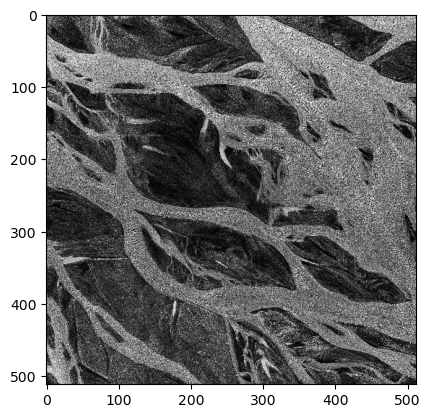

In [36]:
imshow(new_im, cmap='gray')
#new_im


### The Gaussian window is defined by $ w(n)=\exp^{\frac{-1}{2}{\frac{n}{\sigma}}^2}$ where $n$ is the number of pixels in the output window

In [19]:
!pip install --upgrade scipy


In [20]:
!pip install opencv-python


In [39]:
# create a 2D-gaussian kernel、filter with the same size of the image
kernel = np.outer(gaussian(new_im.shape[0], 5), gaussian(new_im.shape[1], 5))# outer product of two vectors,
#each representing a 1D Gaussian window of size of 5 points

# find Fourier transform of the image f(x,y)
freq = fft2(new_im)
# generate a kernel whose origin is in the top-left corner
kern=ifftshift(kernel) # h(x,y)
# calculate FFT of the kernel
freq_kernel = fft2(kern)
# multiply in the frequency domain
product = freq*freq_kernel
# compute the final result
# take the inverse transform of the product and display the real part
im_out = ifft2(product).real # output blurred image

In [41]:
# scale image to original grey-level intensities in the range from 0 to 255
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(im_out)
im_out= scaler.transform(im_out)
im_out


array([[136.92153348, 125.60891302, 116.13533179, ..., 165.67983394,
        163.10499806, 149.66433847],
       [152.99088287, 139.86575525, 128.64543799, ..., 185.98018006,
        182.89984608, 167.58689658],
       [168.11044858, 153.37053538, 140.58589786, ..., 204.78554269,
        201.31837046, 184.35010374],
       ...,
       [ 93.25249352,  87.49739278,  83.37641662, ..., 108.65299362,
        107.99471492, 100.30675021],
       [105.99304022,  98.48583257,  92.67226393, ..., 125.65567897,
        124.33333078, 114.8372147 ],
       [120.89678593, 111.49612217, 103.86090409, ..., 145.11550243,
        143.13932638, 131.68065088]])

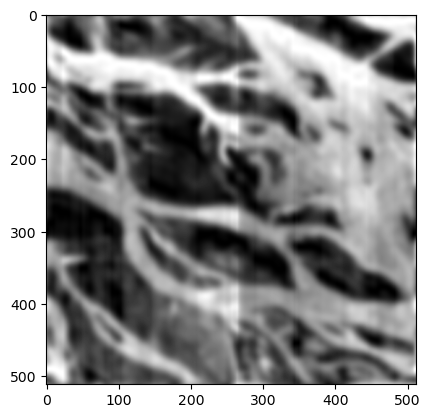

In [43]:
imshow(im_out, cmap='gray')


# Question 1: Is this a high-pass or a low-pass Gaussian filter? By modifying slightly the code above, create a 3-pixel Gaussian kernel and output the resulting image. What do you observe when you narrow the size of the Gaussian wiindow?



Text(0.5, 1.0, '3-px Gaussian')

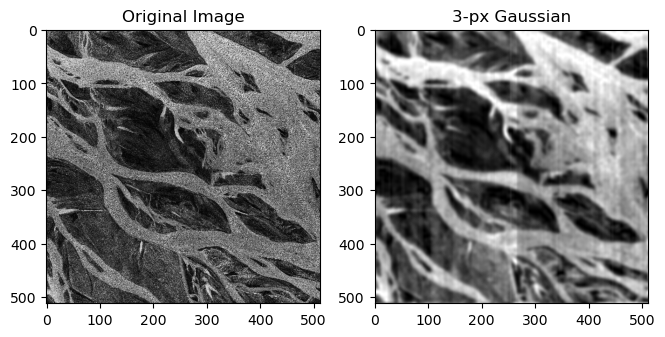

In [48]:
# type your answer here (that includes code)

# its a low pass gaussian filter as it blurs the image by attenuating high frequencies

#creating 30pixedl Gaussial Kernel
kernel_3px = np.outer(gaussian(new_im.shape[0],3), gaussian(new_im.shape[1],3))
freq = fft2(new_im)
kern = ifftshift(kernel_3px)
freq_kernel = fft2(kern)
product = freq*freq_kernel
im_out = ifft2(product).real

#scaling the output image
scaler = MinMaxScaler(feature_range=(0,255))
scaler = scaler.fit(im_out)
im_out = scaler.transform(im_out)

#Displaying the result
plt.figure(figsize=(12, 5))
plt.subplot(131), plt.imshow(new_im, cmap='gray')
plt.title('Original Image')

plt.subplot(132), plt.imshow(im_out, cmap='gray')
plt.title('3-px Gaussian')



## ObservatioN

When applying a 3-px gaussian kernel, the blurring effect is less pronounced compared to the larger kernels. the original image maintains its fine dtails and sharpness cause it has no filter while the 3-px introduces a slight blur which softens the image.

Text(0.5, 1.0, 'High-pass Filtered')

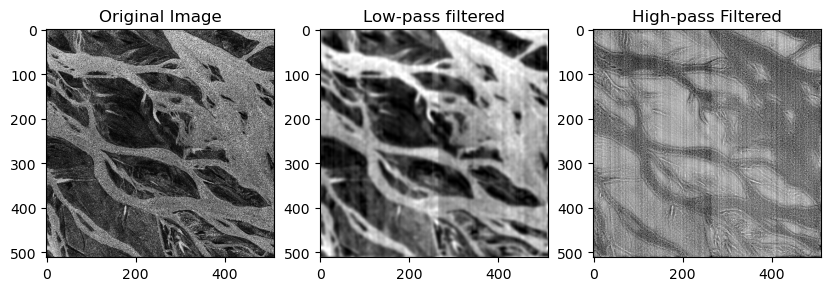

In [66]:
# high-pass Gaussian filtered image is found by subtracting low-pass filtered image from the original one

highpass = new_im - im_out

#scaling the output image
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(highpass)
highpass = scaler.transform(highpass)

#Displaying the result
plt.figure(figsize=(10,5))
plt.subplot(131), plt.imshow(new_im, cmap='gray')
plt.title('Original Image')
plt.subplot(132), plt.imshow(im_out, cmap='gray')
plt.title('Low-pass filtered')
plt.subplot(133), plt.imshow(highpass, cmap='gray')
plt.title('High-pass Filtered')



### Question 2: What would a high-pass Gaussian filter be useful for in the context of image processing?  

1. Image Sharpening
2. Feature Extraction
3. Edge detection
4. Pattern recognition
5. Medical Image Processing
6. Noise Analysis